In [1]:
#@title Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [2]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [3]:
# Get statistics on the dataset.
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [4]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [5]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


2022-04-17 21:21:13.916033: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-17 21:21:13.916361: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.


Train on 17000 samples
Epoch 1/30
17000/17000 [==============================] - 1s 36us/sample - loss: 1534780.9439 - root_mean_squared_error: 1238.8630
Epoch 2/30
17000/17000 [==============================] - 0s 25us/sample - loss: 27867.8929 - root_mean_squared_error: 166.9368
Epoch 3/30
17000/17000 [==============================] - 0s 27us/sample - loss: 26888.8449 - root_mean_squared_error: 163.9782
Epoch 4/30
17000/17000 [==============================] - 0s 28us/sample - loss: 26441.5962 - root_mean_squared_error: 162.6087
Epoch 5/30
17000/17000 [==============================] - 0s 29us/sample - loss: 25625.7989 - root_mean_squared_error: 160.0806
Epoch 6/30
17000/17000 [==============================] - 0s 28us/sample - loss: 24901.0882 - root_mean_squared_error: 157.8008
Epoch 7/30
17000/17000 [==============================] - 0s 27us/sample - loss: 24199.2958 - root_mean_squared_error: 155.5612
Epoch 8/30
17000/17000 [==============================] - 1s 31us/sample - los

/Users/marcoss2/opt/anaconda3/envs/tf/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


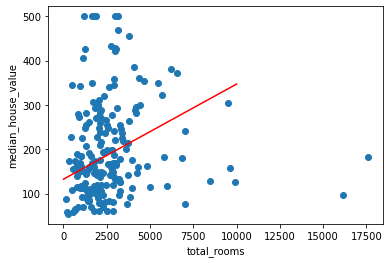

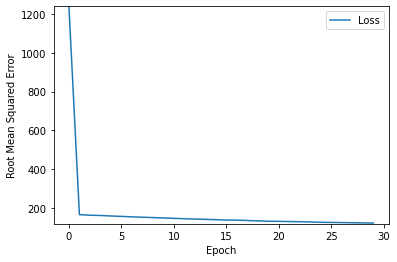

In [6]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [7]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

In [8]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             174
 3400     92             205
 3677     69             211
 2202     62             180
 2403     80             184
 5652    295             254
 3318    500             204
 2552    342             187
 1364    118             162
 3468    128             207


Train on 17000 samples
Epoch 1/18
17000/17000 [==============================] - 5s 288us/sample - loss: 29278.3628 - root_mean_squared_error: 171.1092
Epoch 2/18
17000/17000 [==============================] - 4s 260us/sample - loss: 19844.5935 - root_mean_squared_error: 140.8708
Epoch 3/18
17000/17000 [==============================] - 5s 293us/sample - loss: 18104.6158 - root_mean_squared_error: 134.5534
Epoch 4/18
17000/17000 [==============================] - 6s 333us/sample - loss: 18059.7159 - root_mean_squared_error: 134.3864
Epoch 5/18
17000/17000 [==============================] - 6s 346us/sample - loss: 18108.1890 - root_mean_squared_error: 134.5666
Epoch 6/18
17000/17000 [==============================] - 6s 349us/sample - loss: 17997.4515 - root_mean_squared_error: 134.1545
Epoch 7/18
17000/17000 [==============================] - 6s 357us/sample - loss: 18376.9851 - root_mean_squared_error: 135.5616
Epoch 8/18
17000/17000 [==============================] - 6s 361us/sample 

/Users/marcoss2/opt/anaconda3/envs/tf/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


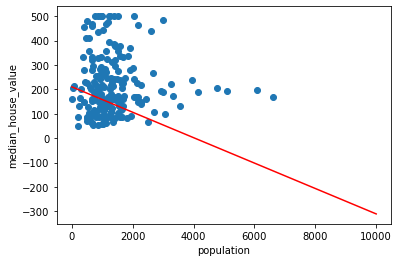

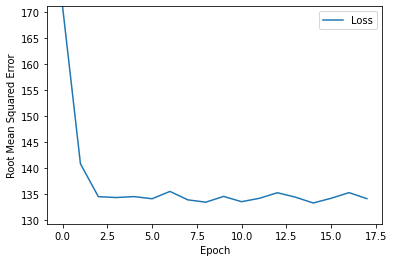

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             143
 1867     92             113
 2191     69              96
 1052     62             156
 1647     80             125
 2312    295              90
 1604    500             127
 1066    342             155
  338    118             193
 1604    128             127
 1200    187             148
  292     80             195
 2014    112             105
 1817     95             116
 1328     69             141


In [15]:
my_feature = "population"   # Replace the ? with population or possibly
                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 0.05
epochs = 18
batch_size = 3

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

In [16]:
# Define a synthetic feature named rooms_per_person
training_df["rooms_per_person"] = training_df["total_rooms"]/training_df["population"]


In [17]:
training_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9,5.5
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1,6.8
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7,2.2
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4,2.9
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5,2.3
...,...,...,...,...,...,...,...,...,...,...
16995,-124.3,40.6,52.0,2217.0,394.0,907.0,369.0,2.4,111.4,2.4
16996,-124.3,40.7,36.0,2349.0,528.0,1194.0,465.0,2.5,79.0,2.0
16997,-124.3,41.8,17.0,2677.0,531.0,1244.0,456.0,3.0,103.6,2.2
16998,-124.3,41.8,19.0,2672.0,552.0,1298.0,478.0,2.0,85.8,2.1


Train on 17000 samples
Epoch 1/24
17000/17000 [==============================] - 1s 39us/sample - loss: 39261.6520 - root_mean_squared_error: 198.1455
Epoch 2/24
17000/17000 [==============================] - 1s 39us/sample - loss: 19196.5352 - root_mean_squared_error: 138.5516
Epoch 3/24
17000/17000 [==============================] - 1s 34us/sample - loss: 15113.7864 - root_mean_squared_error: 122.9381
Epoch 4/24
17000/17000 [==============================] - 1s 30us/sample - loss: 14708.3648 - root_mean_squared_error: 121.2780
Epoch 5/24
17000/17000 [==============================] - 1s 33us/sample - loss: 14547.7100 - root_mean_squared_error: 120.6139
Epoch 6/24
17000/17000 [==============================] - 1s 37us/sample - loss: 14325.9631 - root_mean_squared_error: 119.6911
Epoch 7/24
17000/17000 [==============================] - 0s 29us/sample - loss: 14168.6169 - root_mean_squared_error: 119.0320
Epoch 8/24
17000/17000 [==============================] - 1s 39us/sample - loss: 

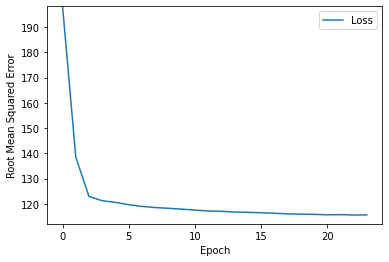

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             189
    2     92             201
    2     69             195
    2     62             211
    1     80             186
    2    295             225
    2    500             210
    2    342             223
    4    118             287
    2    128             214
    2    187             224
    3     80             234
    2    112             225
    2     95             219
    2     69             211


In [22]:
# Don't change the next line.
my_feature = "rooms_per_person"

# Assign values to these three hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)

In [23]:
# Generate a correlation matrix.
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


Train on 17000 samples
Epoch 1/30
17000/17000 [==============================] - 0s 25us/sample - loss: 44680.2171 - root_mean_squared_error: 211.3770
Epoch 2/30
17000/17000 [==============================] - 0s 13us/sample - loss: 29599.4336 - root_mean_squared_error: 172.0449
Epoch 3/30
17000/17000 [==============================] - 0s 13us/sample - loss: 18385.0787 - root_mean_squared_error: 135.5916
Epoch 4/30
17000/17000 [==============================] - 0s 13us/sample - loss: 11074.2433 - root_mean_squared_error: 105.2342
Epoch 5/30
17000/17000 [==============================] - 0s 15us/sample - loss: 7617.7474 - root_mean_squared_error: 87.2797
Epoch 6/30
17000/17000 [==============================] - 0s 14us/sample - loss: 7019.9817 - root_mean_squared_error: 83.7853
Epoch 7/30
17000/17000 [==============================] - 0s 13us/sample - loss: 7014.6702 - root_mean_squared_error: 83.7536
Epoch 8/30
17000/17000 [==============================] - 0s 15us/sample - loss: 7013.7

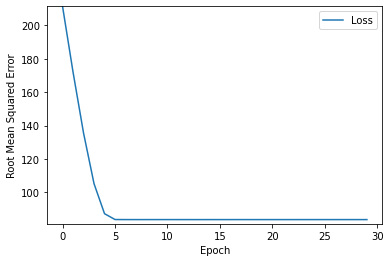

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             134
    4     92             211
    3     69             153
    2     62             132
    3     80             153
    2    295             147
   10    500             454
    5    342             259
    2    118             146
    4    128             220
    8    187             394
    3     80             162
    3    112             178
    4     95             220
    2     69             143


In [25]:
# Don't change the next line.
my_feature = "median_income"

# Assign values to these three hyperparameters.
learning_rate = 0.03
epochs = 30
batch_size = 60

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)